### Set up

First ensure you are using the correct Kernel, this ensures you are using the correct Python virtual environment that has Euphonic installed. In the tool bar above click `Kernel` -> `Change kernel` -> `euphonic`

Now ensure you have the correct version of Euphonic installed. Run the following cell, you should get `0.6.0`

In [1]:
import euphonic
print(euphonic.__version__)

1.3.1


If you don't, you can upgrade your version of Euphonic by opening a terminal and activating the Euphonic virual environment with:
```
source /usr/local/virtualenvs/euphonicenv/bin/activate
```
Then install version 0.6.0 of euphonic with
```
python -mpip install euphonic==0.6.0
```
Once this is done, you will have to restart the Jupyter notebook Kernel by clicking `Kernel` -> `Restart` in the bar above

### Python Help - Viewing documentation and exploring objects

In addition to the Euphonic documentation at https://euphonic.readthedocs.io/en/v0.6.0, there is also various help available directly in Python. Use `dir` to look at the available Euphonic objects and modules. Be careful about using anything that begins with an underscore `_`, these are considered private and could change at any time!

In [2]:
#import euphonic
#dir(euphonic)

`dir` also works on objects themselves:

In [3]:
#from euphonic import ForceConstants
#fc = ForceConstants.from_castep('quartz/quartz.castep_bin')
#dir(fc)

You can also use `help` on an object to see its docstring - this will tell you about its attributes and methods

In [4]:
#help(fc)

Or on a specific method:

In [5]:
#help(fc.calculate_qpoint_phonon_modes)

### File Access
All data files used in this tutorial can be found in the Git repository at https://github.com/pace-neutrons/edatc/blob/main/euphonic_files, they are also available in `/mnt/ceph/auxilary/excitations/edatc/euphonic_files`

## 1. Plotting Dispersion

**1a)** First we need to read the force constants for Quartz from the `quartz.castep_bin` file - we do this with the `ForceConstants.from_castep` method, which returns a `ForceConstants` object. How do we know this object contains the material we were expecting? Try looking at the help for the `crystal` attribute of the `ForceConstants` object you just created. What attributes of `crystal` can we look at to tell us what material we have read in?

In [6]:
from euphonic import ForceConstants

fc = ForceConstants.from_castep('/mnt/ceph-training/course_materials/euphonic_files/quartz.castep_bin')
#help(fc.crystal)

**Solution**
We can look at attributes like `crystal.atom_type` or `crystal.cell_vectors` to see if they match the material we are expecting

In [7]:
### Solution ###
print(fc.crystal.atom_type)
print(fc.crystal.cell_vectors)

['O' 'O' 'O' 'O' 'O' 'O' 'Si' 'Si' 'Si']
[[2.4261758809569254 -4.202259893915576 0.0] [2.4261758809569254 4.202259893915576 0.0] [0.0 0.0 5.350304514188389]] angstrom


As mentioned earlier, polar materials have a longer ranged force-constants matrix, but rather than calculate a larger force constants matrix, it is more efficient to compute a correction to the matrix (although this is still quite expensive!).

This correction requires the Born effective charges and dielectric permitivitty tensor. As Quartz is a polar material, the `ForceConstants` object also contains these quantities.

In [8]:
fc.born

Magnitude,[[[-1.434153141650043 -0.5648018373882707 -0.5139034637256817] [-0.5101726584227205 -1.9091448824501975 -0.585045510690825] [-0.4460481576358204 -0.6203722728124605 -1.7330983708905618]] [[-2.2558745581465036 0.035751577409608104 0.7636160064911333] [0.09038075637515763 -1.0874234659537372 -0.152530699333839] [0.7602822268769915 -0.07610289941763576 -1.7330983708905618]] [[-1.324951209359937 0.4471064915303365 -0.24971254276545507] [0.5017446265442459 -2.018378687746424 0.737576210024668] [-0.31423364957731365 0.6964751722300964 -1.7330983708905618]] [[-2.2558745581465036 -0.03575157740960938 -0.7636160064911333] [-0.09038075637515763 -1.0874234659537378 -0.152530699333839] [-0.7602822268769915 -0.07610289941763584 -1.7330983708905618]] [[-1.324951209359937 -0.4471064915303383 0.24971254276545507] [-0.5017446265442459 -2.0183786877464236 0.737576210024668] [0.31423364957731365 0.6964751722300963 -1.7330983708905618]] [[-1.434153141650043 0.5648018373882693 0.5139034637256817] [0.5101726584227205 -1.9091448824501969 -0.585045510690825] [0.4460481576358204 -0.6203722728124604 -1.7330983708905618]] [[3.5046685451886663 0.27826283128985535 0.23601959880421894] [0.27826283128985535 3.183358304087331 0.13626485393536092] [-0.27183189974996774 -0.15694222049497117 3.467522045885745]] [[3.5046685451886663 -0.27826283128985535 -0.23601959880421894] [-0.27826283128985535 3.183358304087331 0.13626485393536092] [0.27183189974996774 -0.15694222049497109 3.467522045885745]] [[3.022668426824078 0.0 0.0] [0.0 3.665323665739329 -0.2725313953231466] [0.0 0.3138844409899422 3.467522045885745]]]
Units,elementary_charge


**1b)** If we want to plot a dispersion, we need to calculate phonon frequencies for the Q-direction we want to plot in. Q-points for the 1, 0, 0 direction have already been calculated in the cell below using `Numpy`. Use the `ForceConstants.calculate_qpoint_frequencies` method to fill in the gap. This produces a new kind of object, a `QpointFrequencies` object, which contains `crystal` information just like before, but also q-points and frequencies. Look at the phonon frequencies for the first q-point: do they seem sensible?

In [ ]:
# This creates an array of q-points in the 1, 0, 0 direction
import numpy as np
n_qpts = 101
qpts = np.zeros((n_qpts, 3))
qpts[:, 0] = np.linspace(0, 1.0, n_qpts)

modes = # Use calculate_qpoint_frequencies here!

modes.frequencies[0]

In [9]:
### Solution ###
# This creates an array of q-points in the 1, 0, 0 direction
import numpy as np
n_qpts = 101
qpts = np.zeros((n_qpts, 3))
qpts[:, 0] = np.linspace(0, 1.0, n_qpts)

## Solution
modes = fc.calculate_qpoint_frequencies(qpts)
modes.frequencies[0]

Magnitude,[-2.6518031305356433 -1.489636550152536 -1.4895724777863815 15.862268081424936 15.868706444806179 27.652331897193566 31.98939992864457 32.20038624309089 42.21404508131205 42.91601067683933 46.91049806357171 48.255552296058426 54.57600991672359 56.90732710098788 60.53908788024439 61.55937310687521 86.1149873322473 86.52341218619463 95.78436733847944 98.85820161180858 100.38399255333537 132.68469037944533 133.97540960211393 134.71695052565332 142.55237500285904 142.97689549524188 152.81266107583681]
Units,millielectron_volt


**Solution**

Frequencies go up to around 150 meV - this is of a similar order to what has been encountered earlier on this course, so seems reasonable. The first 3 frequencies are negative - this is a gamma point and these 3 frequencies correspond to the acoustic modes, this is a common artefact of force constants calculations where the acoustic sum rule is not exactly satisfied. This can be fixed by applying an acoustic sum rule correction. (If many frequencies were negative, this could be a sign of a poor force constants calculation, but this is not the case here.)

You may notice the frequencies have both a magnitude and a unit - this is true for all dimensioned data in Euphonic. We can change the units frequencies are displayed in by setting `QpointPhononModes.frequencies_unit`. What other units are commonly used for phonon frequencies?

In [10]:
modes.frequencies_unit = '1/cm'
modes.frequencies[0]

Magnitude,[-21.388234662535414 -12.01472904593658 -12.01421226745219 127.93782015674479 127.98974905948083 223.03109788697776 258.01191065391845 259.7136300432647 340.47923537656266 346.1409697297954 378.35868325467266 389.20727726491185 440.18520590854035 458.98854709012124 488.2806732251562 496.50982854917544 694.5642139925112 697.858382597129 772.5530232797026 797.3451686673687 809.6515025454624 1070.1742000689924 1080.5845526702074 1086.5654835703567 1149.7624439590409 1153.1864326426598 1232.5172320904153]
Units,1/centimeter


**Solution**

Another commonly used unit for phonon frequencies is THz - this is used by Phonopy for example

**1c)** To plot a dispersion we need to get the distance between each q-point to be able to plot it on an axis - this can be done with `QpointFrequencies.get_dispersion`. This returns a `Spectrum1DCollection` object, which is used in Euphonic for storing multiple sets of 1D data on the same axes - this fits the description of a bandstructure! It contains all the x and y-axis data required for a plot. All the plotting tools are contained in the `euphonic.plot` module, `plot_1d` can be used to plot `Spectrum1D` or `Spectrum1DCollection` objects.

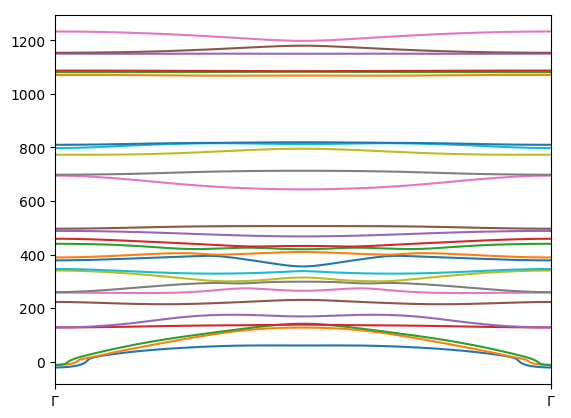

In [11]:
# We need this line so plots display nicely and interactively in the notebook
%matplotlib inline

from euphonic.plot import plot_1d
dispersion = modes.get_dispersion()
fig = plot_1d(dispersion)

Do you notice anything strange about the acoustic frequencies near the gamma points? This can be fixed by applying the **acoustic sum rule** when calculating the q-point frequencies. Use the help for `ForceConstants.calculate_qpoint_frequencies` to figure out which argument to use to apply the sum rule, and recalculate and replot the frequencies.

The x-axis labels aren't very helpful - these are stored in `Spectrum1DCollection.x_tick_labels`. Try setting them to something else more informative and replotting. Also try using the arguments of `plot_1d` to add more helpful axis titles too.

**Extra** Using the `'realspace'` acoustic sum rule actually appears to make things worse! Why could this be? Hint: Quartz is a polar material

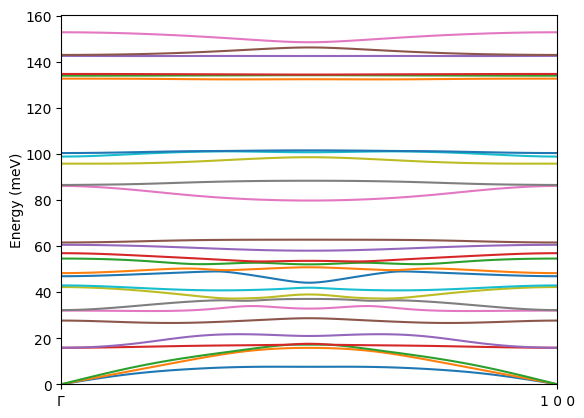

In [12]:
### Solution ###

from euphonic.plot import plot_1d

# Recalculate modes with asr='reciprocal'
modes = fc.calculate_qpoint_frequencies(qpts, asr='reciprocal')
dispersion = modes.get_dispersion()
# Add more helpful x_tick_labels
dispersion.x_tick_labels[-1] = (len(modes.qpts) - 1, '1 0 0')
# Add y-axis label and set y-axis minimum to 0
fig = plot_1d(dispersion, ylabel=f'Energy ({modes.frequencies.units:~P})', ymin=0)

**Extra Solution**

The 'realspace' acoustic sum rule doesn't work in this case because it is only applied to the force constants matrix - and as Quartz is a polar material there is then an extra correction applied to the force constants matrix to which the acoustic sum rule is not applied. This gives strange results! For polar materials the reciprocal sum rule should be used as this applies the correction to the final dynamical matrix.

**1d)** Now plot another dispersion, but this time in the 0, 0, 1 direction. It looks a little different and has lots of points where the modes cross each other. We can follow the modes across reciprocal space by reordering them with `QpointPhononModes.reorder_frequencies`. This requires the eigenvectors so this time we'll need to use `ForceConstants.calculate_qpoint_phonon_modes` instead of `ForceConstants.calculate_qpoint_frequencies`. This returns a `QpointPhononModes` object. This is almost the same as `QpointFrequencies` except it also contains the eigenvectors.

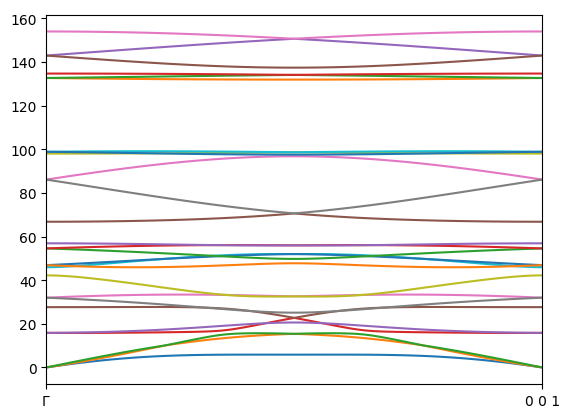

In [13]:
### Solution ###
n_qpts = 101
qpts_001 = np.zeros((n_qpts, 3))
qpts_001[:, 2] = np.linspace(0, 1.0, n_qpts)

modes_001 = fc.calculate_qpoint_phonon_modes(qpts_001, asr='reciprocal')
modes_001.reorder_frequencies()
dispersion_001 = modes_001.get_dispersion()
dispersion_001.x_tick_labels[-1] = (n_qpts - 1, '0 0 1')
fig2 = plot_1d(dispersion_001)

**1e)** We have plotted dispersion in 2 Q-directions, but often it is helpful to plot a path through the Brillouin Zone. Another package, `seekpath` has a function to automatically get a recommended Q-path from the crystal information. It needs the crystal information in a specific form, which is output by `Crystal.to_spglib_cell`. `seekpath` has already been used below to generate a q-point path. Now use `Euphonic` to calculate the q-point frequencies and plot the dispersion. Use `splitting=True` and `insert_gamma=True` when calculating the frequencies this time.

**Extra** The high-symmetry points are labelled with letters, can you find out which symmetry points each letter represents? You can use a function from another package, `spglib.get_spacegroup(cell)` to get the spacegroup of this quartz material. You can use this spacegroup to find the high-symmetry points, for example by inputting it into the following webpage https://www.cryst.ehu.es/cryst/get_kvec.html. Do the labels listed match the q-points in the `QpointPhononModes` object?

In [14]:
import seekpath
cell = fc.crystal.to_spglib_cell()
qpts_path = seekpath.get_explicit_k_path(cell)['explicit_kpoints_rel']

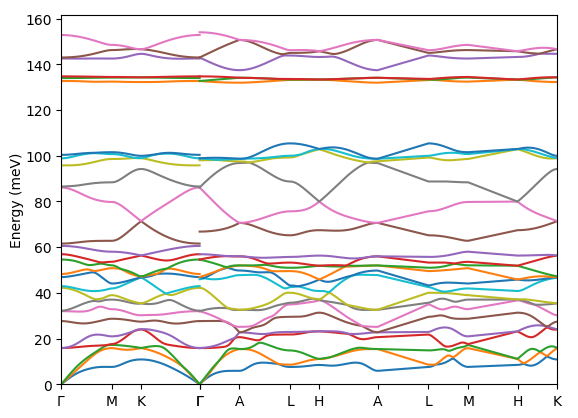

In [15]:
### Solution ###
modes_path = fc.calculate_qpoint_frequencies(qpts_path, asr='reciprocal', splitting=True, insert_gamma=True)
disp_path = modes_path.get_dispersion()
fig_path = plot_1d(disp_path, ylabel=f'Energy ({modes_path.frequencies.units:~P})', ymin=0)

**Extra Solution**
The `spglib.get_spacegroup` function returns 154, which can be put into the webpage to get the high-symmetry labels. These can be checked against the q-points below

In [16]:
### Extra Solution ###
# Get spacegroup of quartz
import spglib
spacegroup = spglib.get_spacegroup(cell)
print(spacegroup)

# Get q-points corresponding to high-symmetry point labels
idx = [x[0] for x in disp_path.x_tick_labels]
modes_path.qpts[idx]

P3_221 (154)


array([[0.        , 0.        , 0.        ],
       [0.5       , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       ],
       [0.5       , 0.        , 0.5       ],
       [0.33333333, 0.33333333, 0.5       ],
       [0.        , 0.        , 0.5       ],
       [0.5       , 0.        , 0.5       ],
       [0.5       , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.5       ],
       [0.33333333, 0.33333333, 0.        ]])

Some lines between high symmetry points appear very straight (e.g. A -> L) - this might mean that there are no plotted points between those 2 points and it is actually a discontinuity in the q-point path. Try looking at the array of q-points to verify this.

We can represent this discontinuity in the plot using `Spectrum1DCollection.split()` to automatically split the dispersion into a list of `Spectrum1DCollection` objects. This list can be passed to `plot_1d` to plot each section of the q-point path on a different subplot. How does it look now?

In [17]:
### Solution ###
# Looking at x_tick_labels we can see 'A' and 'L' are adjacent, at 177 and 178 respectively
# 'M' and 'H' are also adjacent, at 200 and 201
print(disp_path.x_tick_labels)
# We can index into the original q-points to check if this makes sense, for example for M -> H
# We can see the q-points jump from 0.5, 0., 0. -> 0.33, 0.33, 0.5
print(modes_path.qpts[195:205])

[(0, '$\\Gamma$'), (28, 'M'), (44, 'K'), (77, '$\\Gamma$'), (78, '$\\Gamma$'), (100, 'A'), (128, 'L'), (144, 'H'), (177, 'A'), (178, 'L'), (200, 'M'), (201, 'H'), (223, 'K')]
[[0.5        0.         0.11363636]
 [0.5        0.         0.09090909]
 [0.5        0.         0.06818182]
 [0.5        0.         0.04545455]
 [0.5        0.         0.02272727]
 [0.5        0.         0.        ]
 [0.33333333 0.33333333 0.5       ]
 [0.33333333 0.33333333 0.47727273]
 [0.33333333 0.33333333 0.45454545]
 [0.33333333 0.33333333 0.43181818]]


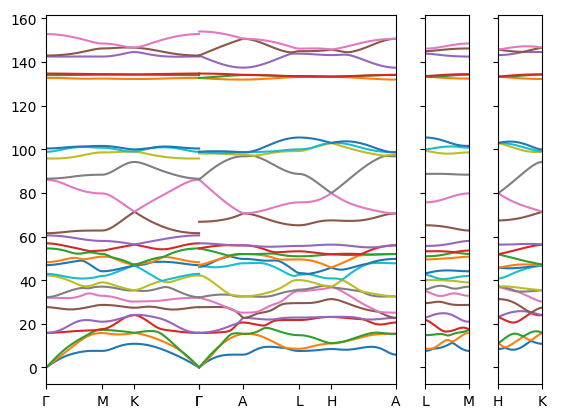

In [18]:
### Solution ###
disp_path_split = modes_path.get_dispersion().split()
fig_path_split = plot_1d(disp_path_split)

**1f)** Euphonic also has some useful command-line tools to quickly plot things such as dispersion. In a terminal, activate the Euphonic Python environment by typing `source /usr/local/virtualenvs/euphonicenv/bin/activate`. Then try using the `euphonic-dispersion` command-line tool to plot the dispersion for quartz e.g. `euphonic-dispersion quartz.castep_bin`. See the help with `euphonic-dispersion --help` and explore the various options available, or try reading in some files for different materials.

These command-line tools can also be called from a script - but it looks a little strange! An example of this is below:

ForceConstants data was loaded
Getting band path...
Computing phonon modes: 27 modes across 224 q-points
Mapping modes to 1D band-structure


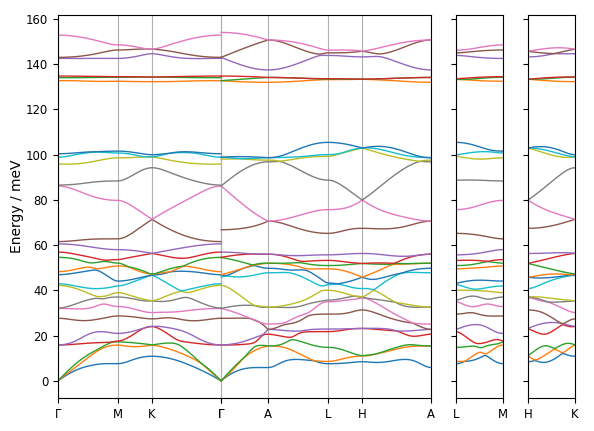

In [19]:
from euphonic.cli.dispersion import main as dispersion_main
dispersion_main(['/mnt/ceph-training/course_materials/euphonic_files/quartz.castep_bin', '--asr=reciprocal', '--energy-unit=meV'])

## 2. Plotting Inelastic Neutron Scattering Intensities for Single Crystals

**2a)** If you look back to the equations from before, to calculate the neutron scattering intensities we need to calculate the neutron scattering structure factors. Remember to calculate the structure factors we need the phonon frequencies **and eigenvectors**. A q-point path has already been defined in the cell below. Use `calculate_qpoint_phonon_modes` to calculate phonon frequencies and eigenvectors on these q-points.

In [20]:
# This creates the q-point path we're using for this section. Don't worry about how its calculated! 
import seekpath
cell = fc.crystal.to_spglib_cell()
qpts_ins = seekpath.get_explicit_k_path(cell, reference_distance=0.005)['explicit_kpoints_rel']
diff = np.linalg.norm(np.diff(qpts_ins, axis=0), axis=1)
qpts_ins = qpts_ins[:np.where(diff > 10*np.mean(diff))[0][0] + 1]

In [21]:
### Solution ###
modes_ins = fc.calculate_qpoint_phonon_modes(qpts_ins, asr='reciprocal')

**2b)** Now calculate the structure factors. We can use the `QpointPhononModes.calculate_structure_factor` method. Calculating the structure factors requires the neutron scattering lengths - these are stored in a data file inside Euphonic so we don't need to input them ourselves. The returned object is a `StructureFactor` object that contains the crystal information, q-points, frequencies and of course structure factors. Why do you think this object still contains the frequencies? Calculate the structure factors using `calculate_structure_factor`.

In [22]:
### Solution ###
sf = modes_ins.calculate_structure_factor()

**Solution**

The `StructureFactor` object still contains frequencies because they are required later to bin the structure factors in energy to calculate the scattering intensities.

**2c)** To calculate the scattering intensities on Q-E axes, we need an array of energy bins, but as we've seen before phonon energies/frequencies can use many different units, so we will need to specify what units the energy bins are in. For this we can use `euphonic.ureg`, which is a `pint.UnitRegistry` object. This contains all the units we will need to use in Euphonic. Below shows an example of creating an array of 10 energy bins from 0 to 500 in 1/cm units. However, this doesn't cover the full range of frequencies, and having only 10 energy bins isn't very useful. Change the energy bins to cover all the frequencies and use a more sensible number of bins, and use whatever units of energy you prefer.

In [23]:
from euphonic import ureg
ebins = np.linspace(0, 500, 10)*ureg('1/cm')

In [24]:
### Solution ###
from euphonic import ureg
ebins = np.linspace(0, 165, 1000)*ureg('meV')

**2d)** We can now finally calculate the inelastic neutron scattering intensities! For this we can use the `StructureFactor.calculate_sqw_map` method, which will calculate the scattering intensities on Q-E axes. This returns a `Spectrum2D` object, which is a generic object for holding 2D data in Euphonic (much like `Spectrum1DCollection` holds multiple 1D data). Use the `calculate_sqw_map` method to calculate S(Q,w), don't forget to include the energy bins.

In [25]:
### Solution
sqw = sf.calculate_sqw_map(ebins)

**2e)** Now we can plot the intensities using `euphonic.plot.plot_2d`. You can use the `vmax` keyword argument of `plot_2d` to change the maximum of the colour scale. Play with the `vmax` argument and see what modes appear as you reduce `vmax`.

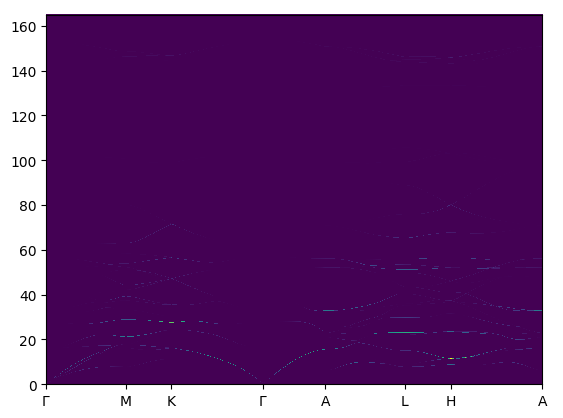

In [26]:
%matplotlib inline
from euphonic.plot import plot_2d
fig = plot_2d(sqw)

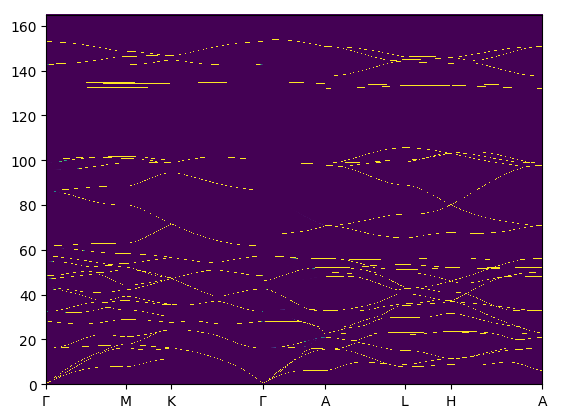

In [27]:
### Solution ###
%matplotlib inline
fig = plot_2d(sqw, vmax=1e-6)
# Higher frequency modes have lower intensities so can only be seen when the maximum colour scale is reduced

**2f)** The plot still doesn't look too realistic, we need to add some in some broadening. Below is an example using the `Spectrum2D.broaden` function to broaden along the y (energy) axis. This returns a new `Spectrum2D` object that can be plotted. Try adding some broadening to the x-axis too, think about what units to use and what a sensible broadening might be.

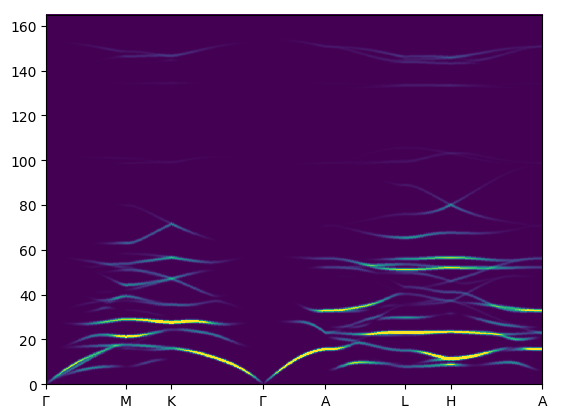

In [28]:
sqwb = sqw.broaden(y_width=1*ureg('meV'))
fig = plot_2d(sqwb, vmax=0.1)

/mnt/ceph-training/course_materials/pace_env/lib/python3.11/site-packages/euphonic/spectra.py:1426: UserWarning: Not all x-axis bins are the same width. Broadening by convolution may give incorrect results.
  warnings.warn(str(e), UserWarning)
/tmp/ipykernel_635696/840603354.py:2: UserWarning: x_data bin widths are not equal, so broadening by convolution may give incorrect results.
  sqwb = sqw.broaden(y_width=1*ureg('meV'), x_width=0.05*ureg('1/angstrom'), method='convolve')


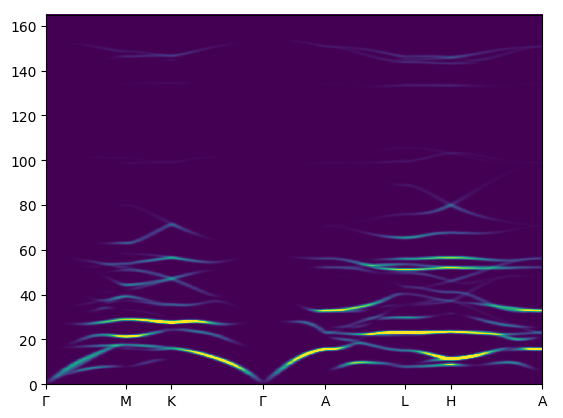

In [29]:
## Solution:
sqwb = sqw.broaden(y_width=1*ureg('meV'), x_width=0.05*ureg('1/angstrom'), method='convolve')
fig = plot_2d(sqwb, vmax=0.1)

It is clear that some phonon modes are brighter than others, and some modes can barely be seen at all. We can plot a dispersion over the top to visualise this using `plot_1d_to_axis`, which can plot 1D spectra on an existing figure axis.

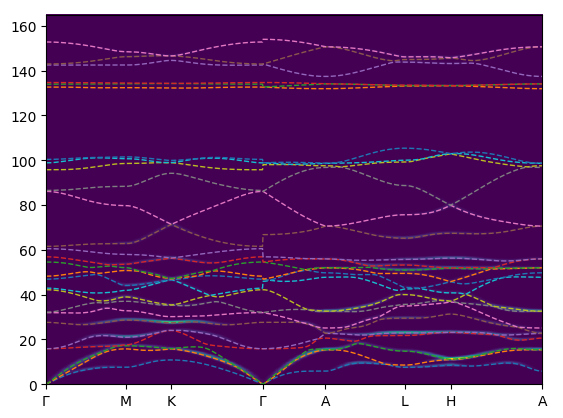

In [30]:
from euphonic.plot import plot_1d_to_axis

fig_sqw_disp = plot_2d(sqwb)
axis = fig_sqw_disp.get_axes()[0]
plot_1d_to_axis(sf.get_dispersion(), axis, lw=1, ls='--')

**2g)** Now plot another S(Q,w) map but use the q-points and energy bins defined below `qpts_h10` and `ebins_negative`. The q-points now span several Brillouin Zones from 0, 0, 0 to 10, 0, 0, and we're now also using negative energy bins. Is there any difference between the intensities in the positive and negative energy bins? By default no temperature effects are included, try setting the `temperature` argument of `calculate_sqw_map` to 300K (remember to use `ureg('K')` to use Kelvin units). This will apply the Bose population factor. Is there any difference now? Try this for a few different temperatures, what happens and why?

In [31]:
import numpy as np
n_qpts = 2001
qpts_h10 = np.zeros((n_qpts, 3))
qpts_h10[:, 0] = np.linspace(0, 10.0, n_qpts)

ebins_negative = np.linspace(-165, 165, 1001)*ureg('meV')

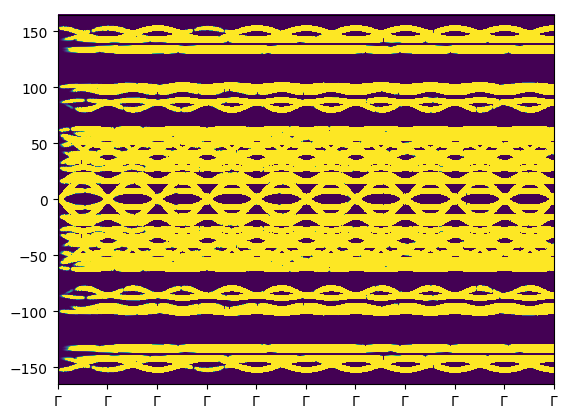

In [32]:
### Solution ###
# No temperature effects
modes_h10 = fc.calculate_qpoint_phonon_modes(qpts_h10)
sf_h10 = modes_h10.calculate_structure_factor()
sqw_h10 = sf_h10.calculate_sqw_map(ebins_negative)
sqw_h10b = sqw_h10.broaden(y_width=1.5*ureg('meV'))
fig = plot_2d(sqw_h10b, vmax=1e-5)

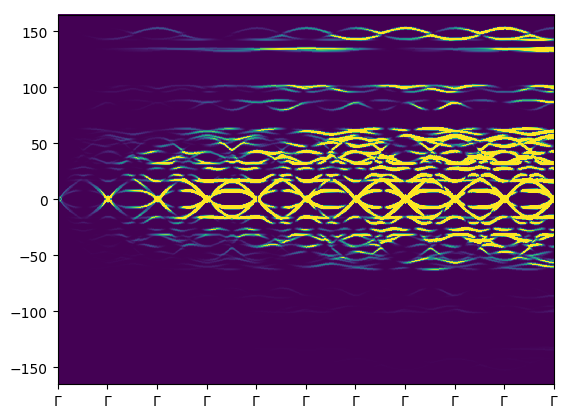

In [33]:
### Solution ###
# 300K
sqw_h10 = sf_h10.calculate_sqw_map(ebins_negative, temperature=300*ureg('K'))
sqw_h10 = sqw_h10.broaden(y_width=1.5*ureg('meV'))
fig = plot_2d(sqw_h10, vmax=1)

**Solution**

When no temperature effects are applied, the intensities in the negative energy bins are just a mirror image of the positive energy bins (**Note: No temperature effects are not the same as zero temperature!**). The positive energy bins represent phonon creation (emission), whereas the negative energy bins represent phonon annihilation (absorption). At zero temperature, there is no intensity in the negative energy bins, as there are no phonons to be absorbed. As temperature increases, more phonons are available to be absorbed, so more intensity can be seen in the negative energy bins. This is represented by the Bose population factor which is repeated below for reference.

$$\normalsize{n_\nu = \frac{1}{e{\frac{\omega_{q\nu}}{k_BT}} - 1}}$$

**2h)** The Bose population factor is one temperature-dependent effect, let's now look at the other - the Debye-Waller factor. The Debye-Waller factor requires a sum over q-points in the 1st Brillouin Zone, so first we must generate a grid of q-points. For this we can use the `Crystal.get_mp_grid_spec` method, this generates a size-3 tuple defining a recommended Monkhorst-Pack grid, based on the size and shape of the unit cell. We can then put this into `euphonic.util.mp_grid` function to actually generate the q-points. We then need to calculate the phonon frequencies and eigenvectors on these q-points, then use the `QpointPhononModes.calculate_debye_waller` method to calculate the Debye-Waller exponent at a particular temperature. This returns a `DebyeWaller` object, which contains the crystal information, temperature, and 3x3 Debye-Waller exponent matrix for each atom in the unit cell. This has already been done below for 300K.

Recalculate the structure factor with the Debye-Waller applied by passing the created `DebyeWaller` object as the `dw` keyword argument to `calculate_structure_factor`. From this calculate and plot S(Q, w). This time we don't need to use the `temperature` argument to add the Bose factor, as the temperature is automatically obtained from the `DebyeWaller` object.

How has including the Debye-Waller factor changed the intensities at high and low Q? Looking at the coherent one-phonon scattering equation, what is the Q-dependence with and without the Debye-Waller factor included? What happens when you change the temperature?

In [34]:
from euphonic.util import mp_grid
grid_spec = fc.crystal.get_mp_grid_spec()
qpts_grid = mp_grid(grid_spec)

modes_dw = fc.calculate_qpoint_phonon_modes(qpts_grid)
dw = modes_dw.calculate_debye_waller(300*ureg('K'))

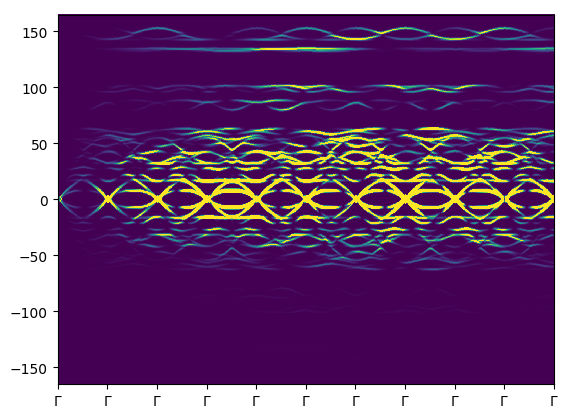

In [35]:
### Solution ###
sf_dw = modes_h10.calculate_structure_factor(dw=dw)
sqw_dw = sf_dw.calculate_sqw_map(ebins_negative)
sqw_dwb = sqw_dw.broaden(y_width=1.5*ureg('meV'))
figdwb = plot_2d(sqw_dwb, vmax=0.5)

**Solution**

Including the Debye-Waller at 300K has resulted in higher intensities at lower Q. Without the Debye-Waller factor the Q-dependence of the intensities is $Q^2$ (due to the $[Q\cdot\epsilon_{q\nu\kappa\alpha}]$ term below), but with the Debye-Waller factor the dependence is $Q^2e^{-WQ^2}$. The W coefficient increases as T decreases (specifically W ~ coth(x/T)) so at lower temperatures higher Qs are visible. Equations are repeated below for reference and this is also visualised in the plots below
 
$$\normalsize{ S(Q, \omega_{q\nu}) =
    \frac{1}{2N_{atom}} \left\lvert{\sum\limits_{\kappa}\frac{b_\kappa}{M_{\kappa}^{1/2}\omega_{q\nu}^{1/2}}
    [Q\cdot\epsilon_{q\nu\kappa\alpha}]e^{iQ{\cdot}r_{\kappa}}e^{-W}}\right\rvert^2}$$
                                                
            
$$\Large{e^{-W} = e^{-\sum\limits_{\alpha\beta}W^{\kappa}_{\alpha\beta}Q_{\alpha}Q_{\beta}}}$$

$$\normalsize{W^{\kappa}_{\alpha\beta} =
        \frac{1}{4M_{\kappa}\sum\limits_q{weight_q}}
        \sum\limits_{q\nu}weight_q\frac{\epsilon_{q\nu\kappa\alpha}\epsilon^{*}_{q\nu\kappa\beta}}{\omega_{q\nu}}
        \mathrm{coth}(\frac{\omega_{q\nu}}{2k_BT})}$$

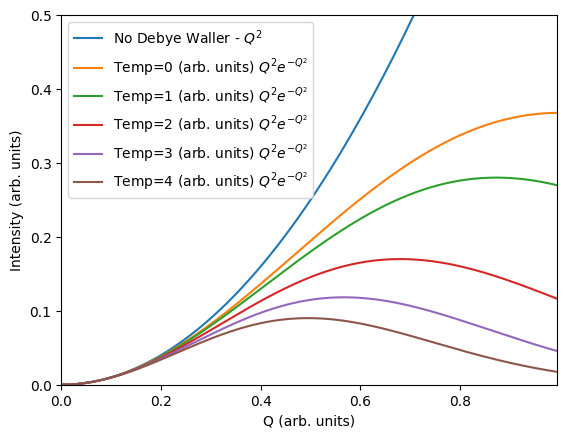

In [36]:
from euphonic import Spectrum1D
from euphonic.plot import plot_1d

x = np.arange(0, 1, 0.005)*ureg('dimensionless')
fig = plot_1d(Spectrum1D(x, x**2), labels=['No Debye Waller - $Q^2$'],
              xlabel='Q (arb. units)',
              ylabel='Intensity (arb. units)',
              ymin=0.0, ymax=0.5)
ax = fig.get_axes()[0]
temps = [0, 1, 2, 3, 4]
for temp in temps:
    if temp == 0:
        # Avoid divide by zero. tanh(1/0.0) = 1.0
        y = x**2*np.exp(-(x**2))
    else:
        y = (x**2)*np.exp(-(x**2)/np.tanh(1/temp))
    plot_1d_to_axis(Spectrum1D(x, y), ax, labels=[f'Temp={temp} (arb. units) $Q^2e^{{-Q^2}}$'])

## 3. Powders - Plotting DOS

The previous examples have all been for single crystal quartz - we will now look at calculating neutron-weighted density of states which can be useful for powder analysis using the incoherent approximation. As a reminder, the neutron-weighted density of states is:

$$\sum\limits_\kappa{(\frac{\sigma_{\kappa}}{m_{\kappa}})PDOS_{\kappa}(E)}$$

**3a)** First we will read in some experimental density of states for Aluminium and Silicon to compare to - these are the same as you may have created in the MSlice course on day 1. These have been converted to Euphonic `Spectrum1D` objects and are stored as `.json` files. In fact, all Euphonic objects can be converted to/from .json files! The spectra can be read using the `Spectrum1D.from_json_file` method (just like the `ForceConstants.from_castep` method). This has already been done below, and they have also been plotted on the same axes.

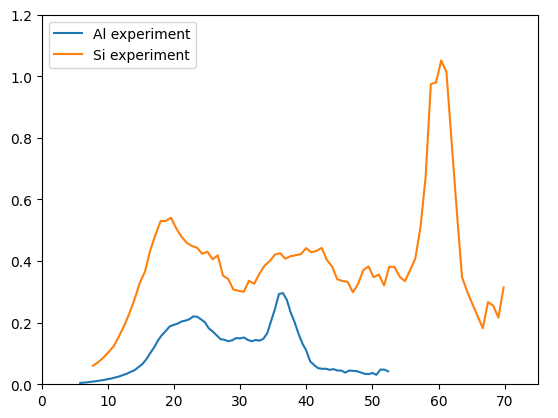

In [37]:
from euphonic import Spectrum1D
from euphonic.plot import plot_1d, plot_1d_to_axis

exp_dos_si = Spectrum1D.from_json_file('/mnt/ceph-training/course_materials/euphonic_files/Si_experimental_dos.json')
exp_dos_al = Spectrum1D.from_json_file('/mnt/ceph-training/course_materials/euphonic_files/Al_experimental_dos.json')

fig = plot_1d(exp_dos_al)
ax = fig.get_axes()[0]
plot_1d_to_axis(exp_dos_si, ax)
_ = ax.set_xlim([0, 75])
_ = ax.set_ylim([0, 1.2])

**3a)** First we will create a neutron-weighted density of states for Silicon. The silicon file is `euphonic_files/Si-prim-555.json`. This is a JSON file that has been created from a Euphonic `ForceConstants` object. Use `ForceConstants.from_json_file` to read in the Silicon file.

In [38]:
### Solution ###
from euphonic import ForceConstants
fc_si = ForceConstants.from_json_file('/mnt/ceph-training/course_materials/euphonic_files/Si-prim-555.json')

**3b)** Now calculate `QpointPhononModes` on a grid of q-points like we did when calculating the Debye-Waller factor. 

To calculate the PDOS, we need the energy bins. For easier comparison to experiment, lets use the same energy bins as the experimental data. In a `Spectrum1D` object the x-axis data is stored in the `x_data` attribute, which for a DOS is the energy bins. So we want to use `exp_dos_si.x_data` as the energy bins.

Then we can use `QpointPhononModes.calculate_pdos` to calculate a partial density of states. To get a coherent neutron-weighted partial density of states use the `weighting='coherent'` argument. This calculation needs the neutron scattering cross-sections, but these are stored inside Euphonic like the scattering lengths and will be used automatically.

In [39]:
### Solution ###
from euphonic import ureg
from euphonic.util import mp_grid
qpts_si = mp_grid(fc_si.crystal.get_mp_grid_spec())
modes_si = fc_si.calculate_qpoint_phonon_modes(qpts_si)

ebins_si = exp_dos_si.x_data
pdos_si = modes_si.calculate_pdos(ebins_si, weighting='coherent')

**3c)** `calculate_pdos` produces a `Spectrum1DCollection` object containing a spectrum for each atom in the unit cell. We can tell which atom is which by looking at the `Spectrum1DCollection.metadata` attribute, which is a metadata dictionary. `'line_data'` is a special key which is a list of metadata dictionaries, one for each spectrum in the collection. You can index into `Spectrum1DCollection` just like a list to obtain individual spectra, this makes it easy to see metadata for a particular spectrum e.g. `pdos[0].metadata`. You will notice `weighting`, `species` and `index` entries have been automatically added which allow us to distinguish between different spectra.

For now we just want the total neutron-weighted DOS, so use the `Spectrum1DCollection.sum()` method to get the total DOS. This will sum the `y_data` for each spectrum together - returning a `Spectrum1D`. Any metadata not common to all spectra, for example `index`, will be discarded.

There is another special metadata key, `'label'` which will automatically be used as a legend label when plotting. Set this key for the total Si dos spectrum with `dos_si.metadata['label'] = 'Si'`

In [40]:
### Solution ###
print(f'All PDOS metadata {pdos_si.metadata}')
print(f'\nFirst spectrum metadata {pdos_si[0].metadata}')
dos_si = pdos_si.sum()
print(f'\nTotal DOS metadata {dos_si.metadata}')
dos_si.metadata['label'] = 'Si'

All PDOS metadata {'line_data': [{'species': 'Si', 'index': 0}, {'species': 'Si', 'index': 1}], 'weighting': 'coherent'}

First spectrum metadata {'weighting': 'coherent', 'species': 'Si', 'index': 0}

Total DOS metadata {'weighting': 'coherent', 'species': 'Si'}


**3d** Now plot both experimental and calculated Si spectra on the same axes. We can use `plot_1d_to_axis` as before. It doesn't look right does it? We need to multiply the experimental data by a scaling factor. We can make a good guess at this by dividing the `y_data` of one spectrum by the other, e.g.:

```
scale = np.nanmean(dos_si.y_data.magnitude/exp_dos_si.y_data.magnitude)
```

Note that we have used Numpy's `nanmean` (as density of states often contain lots of zeros, and we want to ignore any NaNs generated by dividing by zero). We have also used the `magnitude` of the `y_data` as they are in different units but we want a dimenionless scale factor out. Multiply this scale by the `y_data` of the experimental data, e.g.:

```
exp_dos_si.y_data *= scale
```

Now replot the data. How does it look?

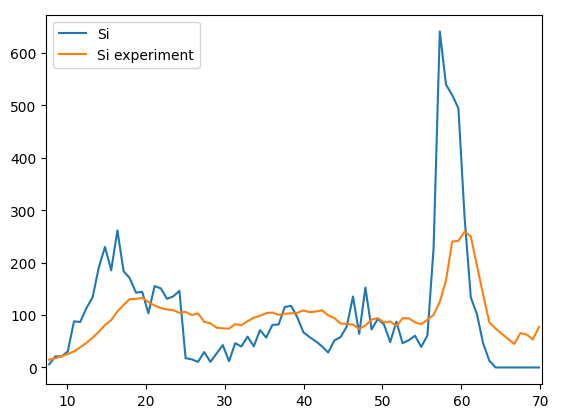

In [41]:
### Solution ###
scale = np.nanmean(dos_si.y_data.magnitude/exp_dos_si.y_data.magnitude)
exp_dos_si.y_data *= scale
fig = plot_1d(dos_si)
ax = fig.get_axes()[0]
plot_1d_to_axis(exp_dos_si, ax)

**3e)** We still need to add some broadening. Broaden the calculated DOS by 3 meV and replot. What differences do you see between the experimental and theoretical data? Why do you think this could be?

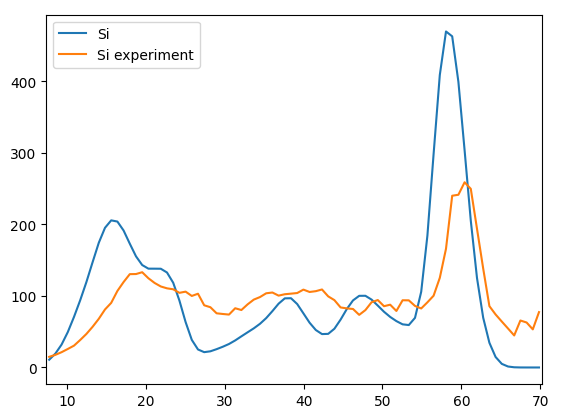

In [42]:
### Solution ###
dos_sib = dos_si.broaden(3*ureg('meV'))
fig = plot_1d(dos_sib)
ax = fig.get_axes()[0]
plot_1d_to_axis(exp_dos_si, ax)

**Solution**
We have only included a fixed-width broadening of 3meV, whereas real instrumental broadening is energy (and Q) dependent. Also, the peaks of the experimental and theoretical data are offset, this is a systematic error coming from the underlying DFT calculation, and depends on the details of the calculation.

**3d)** Now calculate the total DOS for Aluminium.The force constants are in `Al/Al-444-lda.yaml`. This is a Phonopy file, so you will need to use `ForceConstants.from_phonopy`. Remember to use the same energy bins as the Al experiment.

In this case, as there is only one atom in the unit cell, there will be only one spectrum contained in the `Spectrum1DCollection`! In this case, we can use `Spectrum1DCollection.sum` or we can just get the first spectrum in the collection by indexing e.g. `pdos_al[0]`, they both give the same result.

Scale, broaden and plot the data just as before. How do they compare?

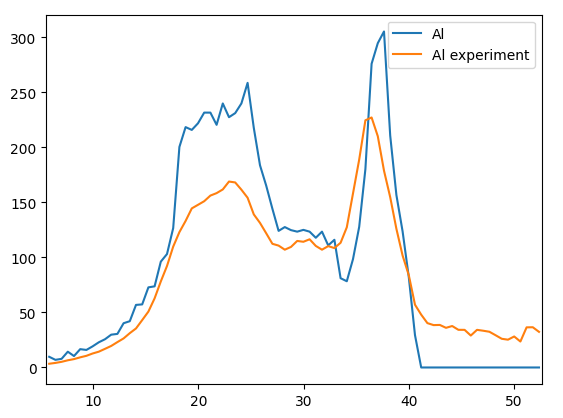

In [43]:
### Solution ###
fc_al = ForceConstants.from_phonopy(summary_name='/mnt/ceph-training/course_materials/euphonic_files/Al-444-lda.yaml')

qpts_al = mp_grid(fc_al.crystal.get_mp_grid_spec())
modes_al = fc_al.calculate_qpoint_phonon_modes(qpts_al)
ebins_al = exp_dos_al.x_data
pdos_al = modes_al.calculate_pdos(ebins_al, weighting='coherent')
dos_al = pdos_al.sum()
dos_al.metadata['label'] = 'Al'

scale = np.nanmean(dos_al.y_data.magnitude/exp_dos_al.y_data.magnitude)
exp_dos_al.y_data *= scale

fig = plot_1d(dos_al)
ax = fig.get_axes()[0]
plot_1d_to_axis(exp_dos_al, ax)

**3g)** The above examples only contained one species of atom, so handling returned PDOS was fairly simple. `LZO/La2Zr2O7_pdos.json` contains PDOS for a 22-atom, 3-species unit cell with both coherent and incoherent weighting. We can read this file using `Spectrum1DCollection.from_json_file` and plot it, which has been done below.

However, this doesn't tell us much! We can use the `Spectrum1DCollection.select` and `Spectrum1DCollection.group_by` methods to select and group spectra by their metadata. Try selecting only the coherent spectra and then grouping by species to plot the coherent per-species PDOS. Add some useful legend labels (you can do this by looping over `lzo_pdos.metadata['line_data']` and setting the `'label'` metadata key for each spectrum, or you could use the `labels` argument to plot_1d).

What other useful groupings and selections can you make?

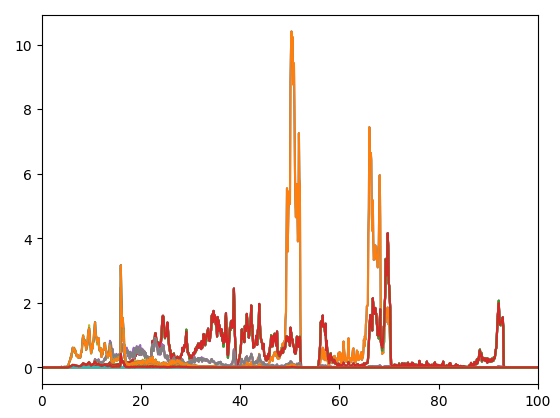

In [44]:
from euphonic import Spectrum1DCollection
lzo_pdos = Spectrum1DCollection.from_json_file('/mnt/ceph-training/course_materials/euphonic_files/La2Zr2O7_pdos.json')
fig = plot_1d(lzo_pdos)

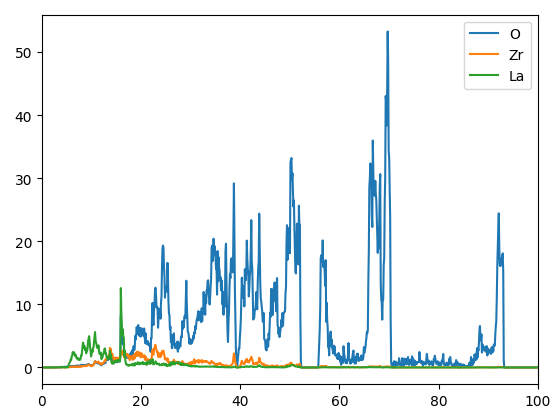

In [45]:
### Solution ###
# Plot coherent per-species PDOS
lzo_coh_species_pdos = lzo_pdos.select(weighting='coherent').group_by('species')
for data in lzo_coh_species_pdos.metadata['line_data']:
    data['label'] = data['species']
fig = plot_1d(lzo_coh_species_pdos)

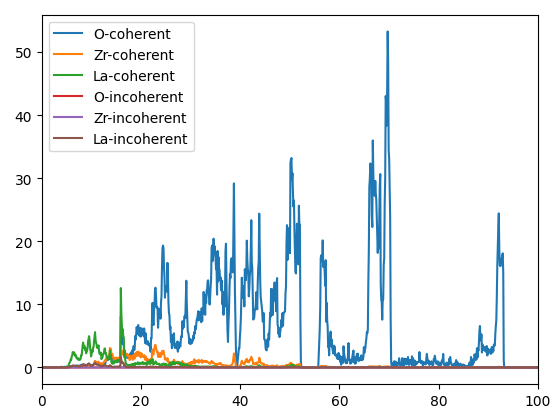

In [46]:
### Solution ###
# Plot coherent and incoherent per-species PDOS
lzo_species_pdos = lzo_pdos.group_by('weighting', 'species')
for data in lzo_species_pdos.metadata['line_data']:
    data['label'] = f"{data['species']}-{data['weighting']}"
fig = plot_1d(lzo_species_pdos)

Euphonic also has a useful command line tool for plotting DOS and PDOS, `euphonic-dos`. Like with the dispersion tool, you can run it from the command line after actviating the euphonic environment with `source /usr/local/virtualenvs/euphonicenv/bin/activate`, or it can be called programatically like the example below

ForceConstants data was loaded
Calculating phonon modes on 15 x 15 x 12 q-point grid...


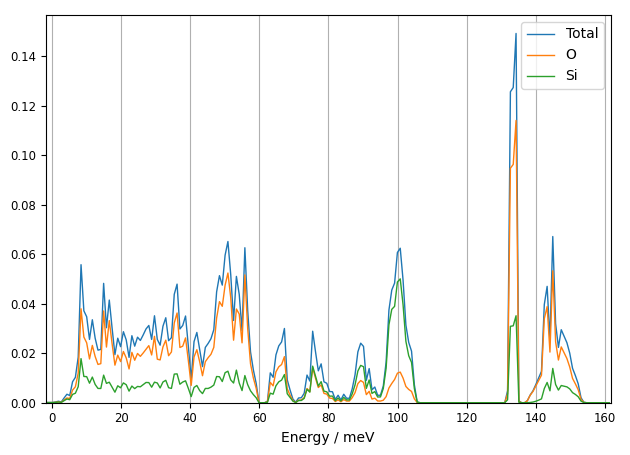

In [47]:
from euphonic.cli.dos import main as dos_main

dos_main(['/mnt/ceph-training/course_materials/euphonic_files/quartz.castep_bin', '--pdos'])

## 4. Powders - Plotting S(|Q|, $\omega$)

Powders/polycrystalline samples are formed from many crystallites, each with a random orientation. This means that the directional information is lost - so we can only measure $\lvert{Q}\rvert$. Each $\lvert{Q}\rvert$ is contributed to by many Q, which lie on a sphere of radius $\lvert{Q}\rvert$. We can simulate this numerically by calculating and summing the scattering intensities over spheres of different $\lvert{Q}\rvert$ - this is known as spherical averaging

**4a)** Euphonic has a command-line tool called `euphonic-show-sampling` which can visualise the distribution of the points used for spherical averaging. The recommended sampling method is `golden-sphere`, which is shown below. Visualise two other methods, `sphere-from-square-grid` and `random-sphere`. What could be some problems with these other methods?

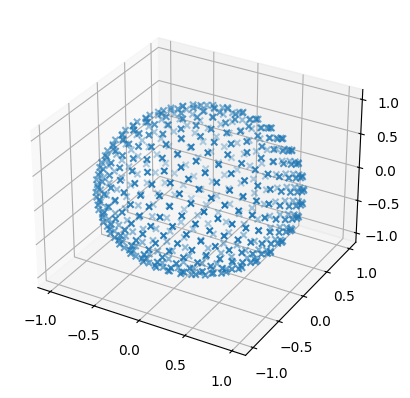

In [48]:
from euphonic.cli.show_sampling import main as smain
smain(['500', 'golden-sphere'])

**Solution**

`sphere-from-square-grid` bunches samples at the poles, and has lots of straight lines in the sampling, this could lead to artefacts in the data. `random-sphere` scatters points randomly so has areas of very high or low sampling - many q-point samples may be needed to get a good distribution.

**4b)** Currently generating a $\lvert{Q}\rvert$, E powder map in Euphonic is only accessible via the command-line tool `euphonic-powder-map`. Powder averaging is quite computationally expensive, so this tool may take a while to run. It is recommended to install the Python package `tqdm` to get a useful progress bar - you can do this in IDAaaS by opening a terminal and typing:
```
source /usr/local/virtualenvs/euphonicenv/bin/activate
python -mpip install tqdm
```

First we will look at how the averaging behaves as we move from low to high $\vert{Q}\rvert$ by calculating a DOS over each shell - this will not correspond to any actual data but is a good way of visualising the sampling. Try running the following in a terminal (remember to activate the euphonic environment):

```
euphonic-powder-map ../euphonic_files/Al-444-lda.yaml --q-max 10 --npts-density 1000 --npts-max 20000 --jitter --n-threads 30
```

It is recommended to run these tools from the command-line rather than via the Jupter notebook, as running them from the command line allows you to change the intensity scale once the plot has been generated.

What happens to the intensities at increasing $\lvert{Q}\rvert$? Why?


**Solution**
At increasing $\lvert{Q}\rvert$ features in the data (such as the dispersion seen at low $\lvert{Q}\rvert$) are less clear and it converges to a density of states. This is because at higher $\lvert{Q}\rvert$ the radius of the sphere is higher and it cuts through more Brillouin Zones.

ForceConstants data was loaded
Setting up dimensions...
Sampling 400 |q| shells between 0.0 1/Å and 10.0 1/Å
Final npts: 20000
Plotting figure: max intensity 2.5502211569933957 1/meV


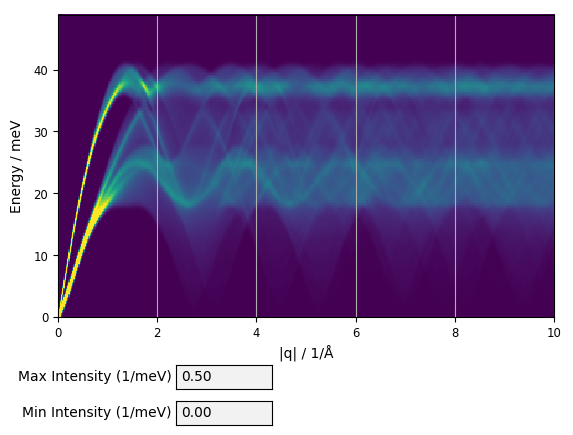

In [49]:
### Solution ###
from euphonic.cli.powder_map import main as pmain
pmain(['/mnt/ceph-training/course_materials/euphonic_files/Al-444-lda.yaml', 
       '--q-max=10', '--npts-density=1000', '--npts-max=20000', '--eb=1', '--n-threads=30', '--v-max=0.5'])

Below are some examples of experimental $\lvert{Q}\rvert$, E cuts for Aluminium and Silicon. Play with the parameters of `euphonic-powder-map` and see how close you can get to the experimental data. Remember to use `euphonic-powder-map --help` to see what is available

## Aluminium

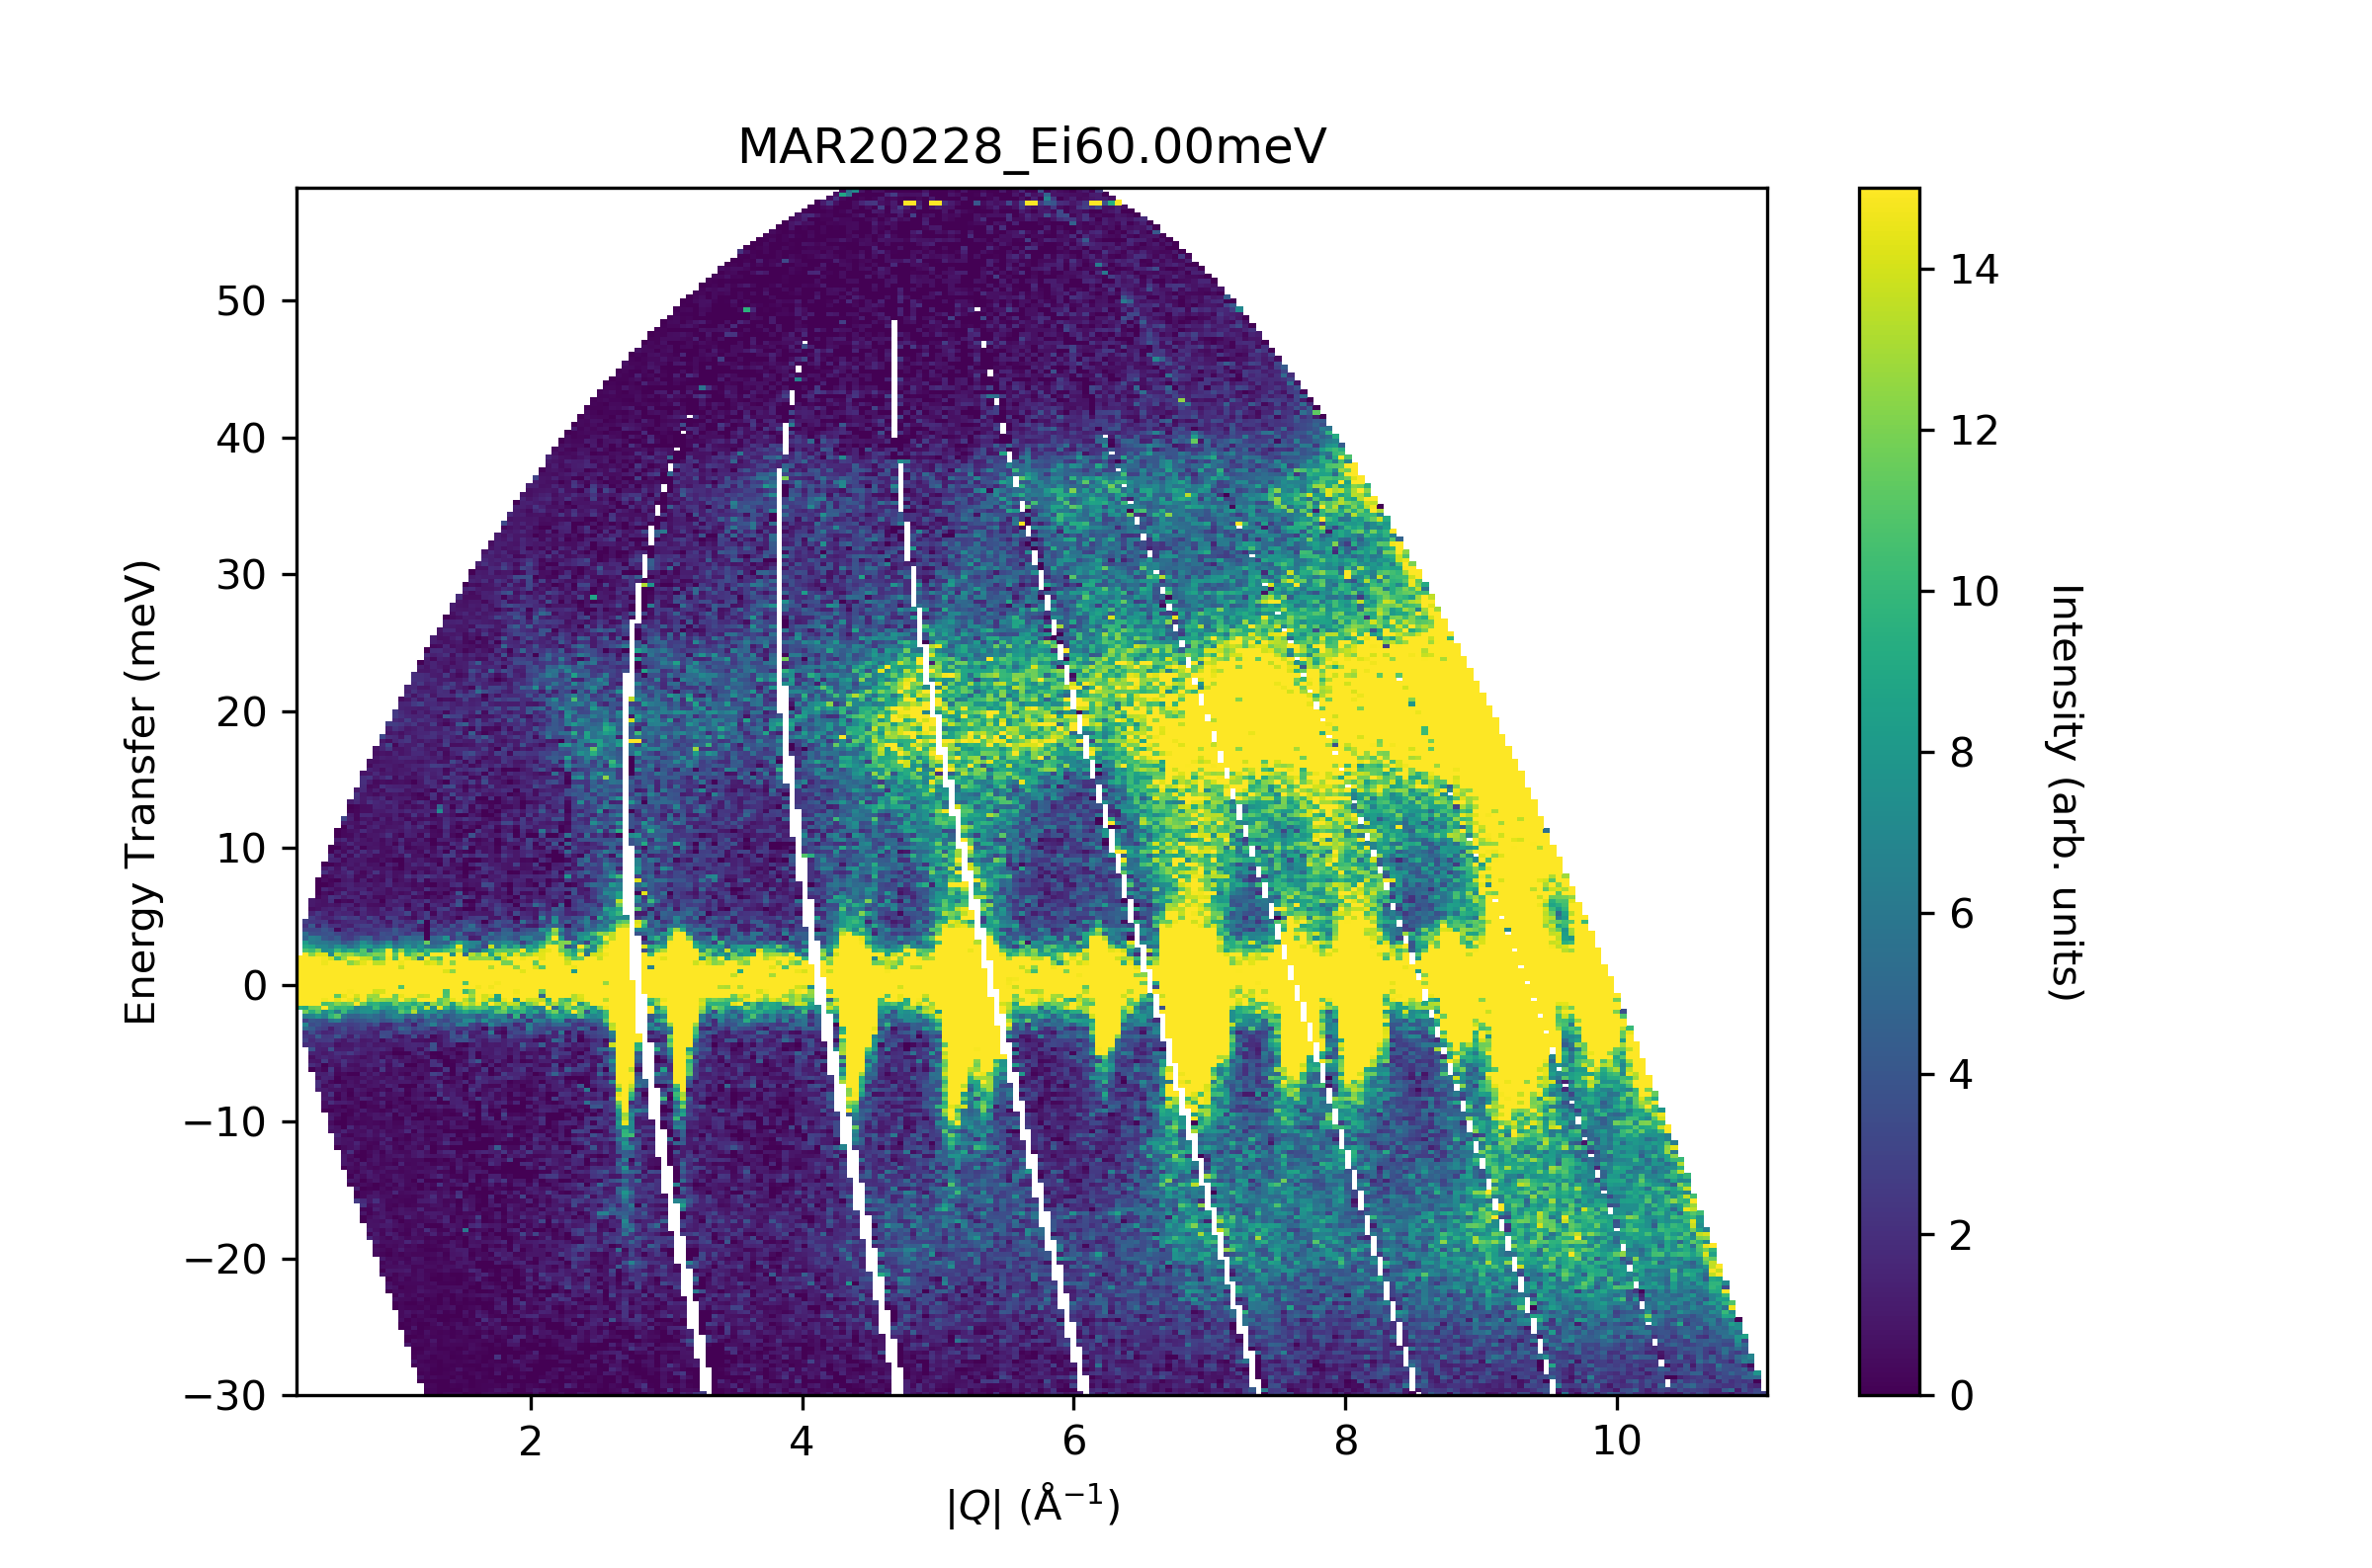

**Solution**

`euphonic-powder-map ../euphonic_files/Al-444-lda.yaml -w coherent --q-max 10 --temperature 300 --grid 20 20 20 --npts-density 1000 --npts-max 10000 --eb 2 --e-min -30 --e-max 50 --v-max 2e-5 --n-threads 30`

ForceConstants data was loaded
Setting up dimensions...
Calculating Debye-Waller factor on 20 x 20 x 20 q-point grid
Sampling 400 |q| shells between 0.0 1/Å and 10.0 1/Å
Final npts: 10000
Plotting figure: max intensity 32.02141035327559 mb/meV


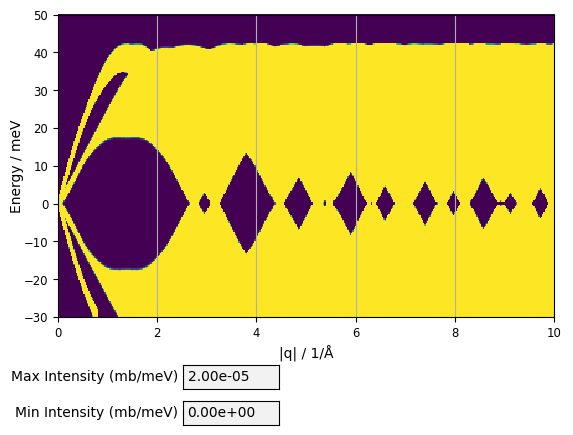

In [50]:
pmain(['/mnt/ceph-training/course_materials/euphonic_files/Al-444-lda.yaml', '-w=coherent', '--q-max=10', '--temperature=300',
       '--grid', '20', '20', '20', '--npts-density=500', '--npts-max=10000', '--eb=1',
       '--e-min=-30', '--e-max=50', '--v-max=2e-5', '--n-threads=30'])

# Silicon

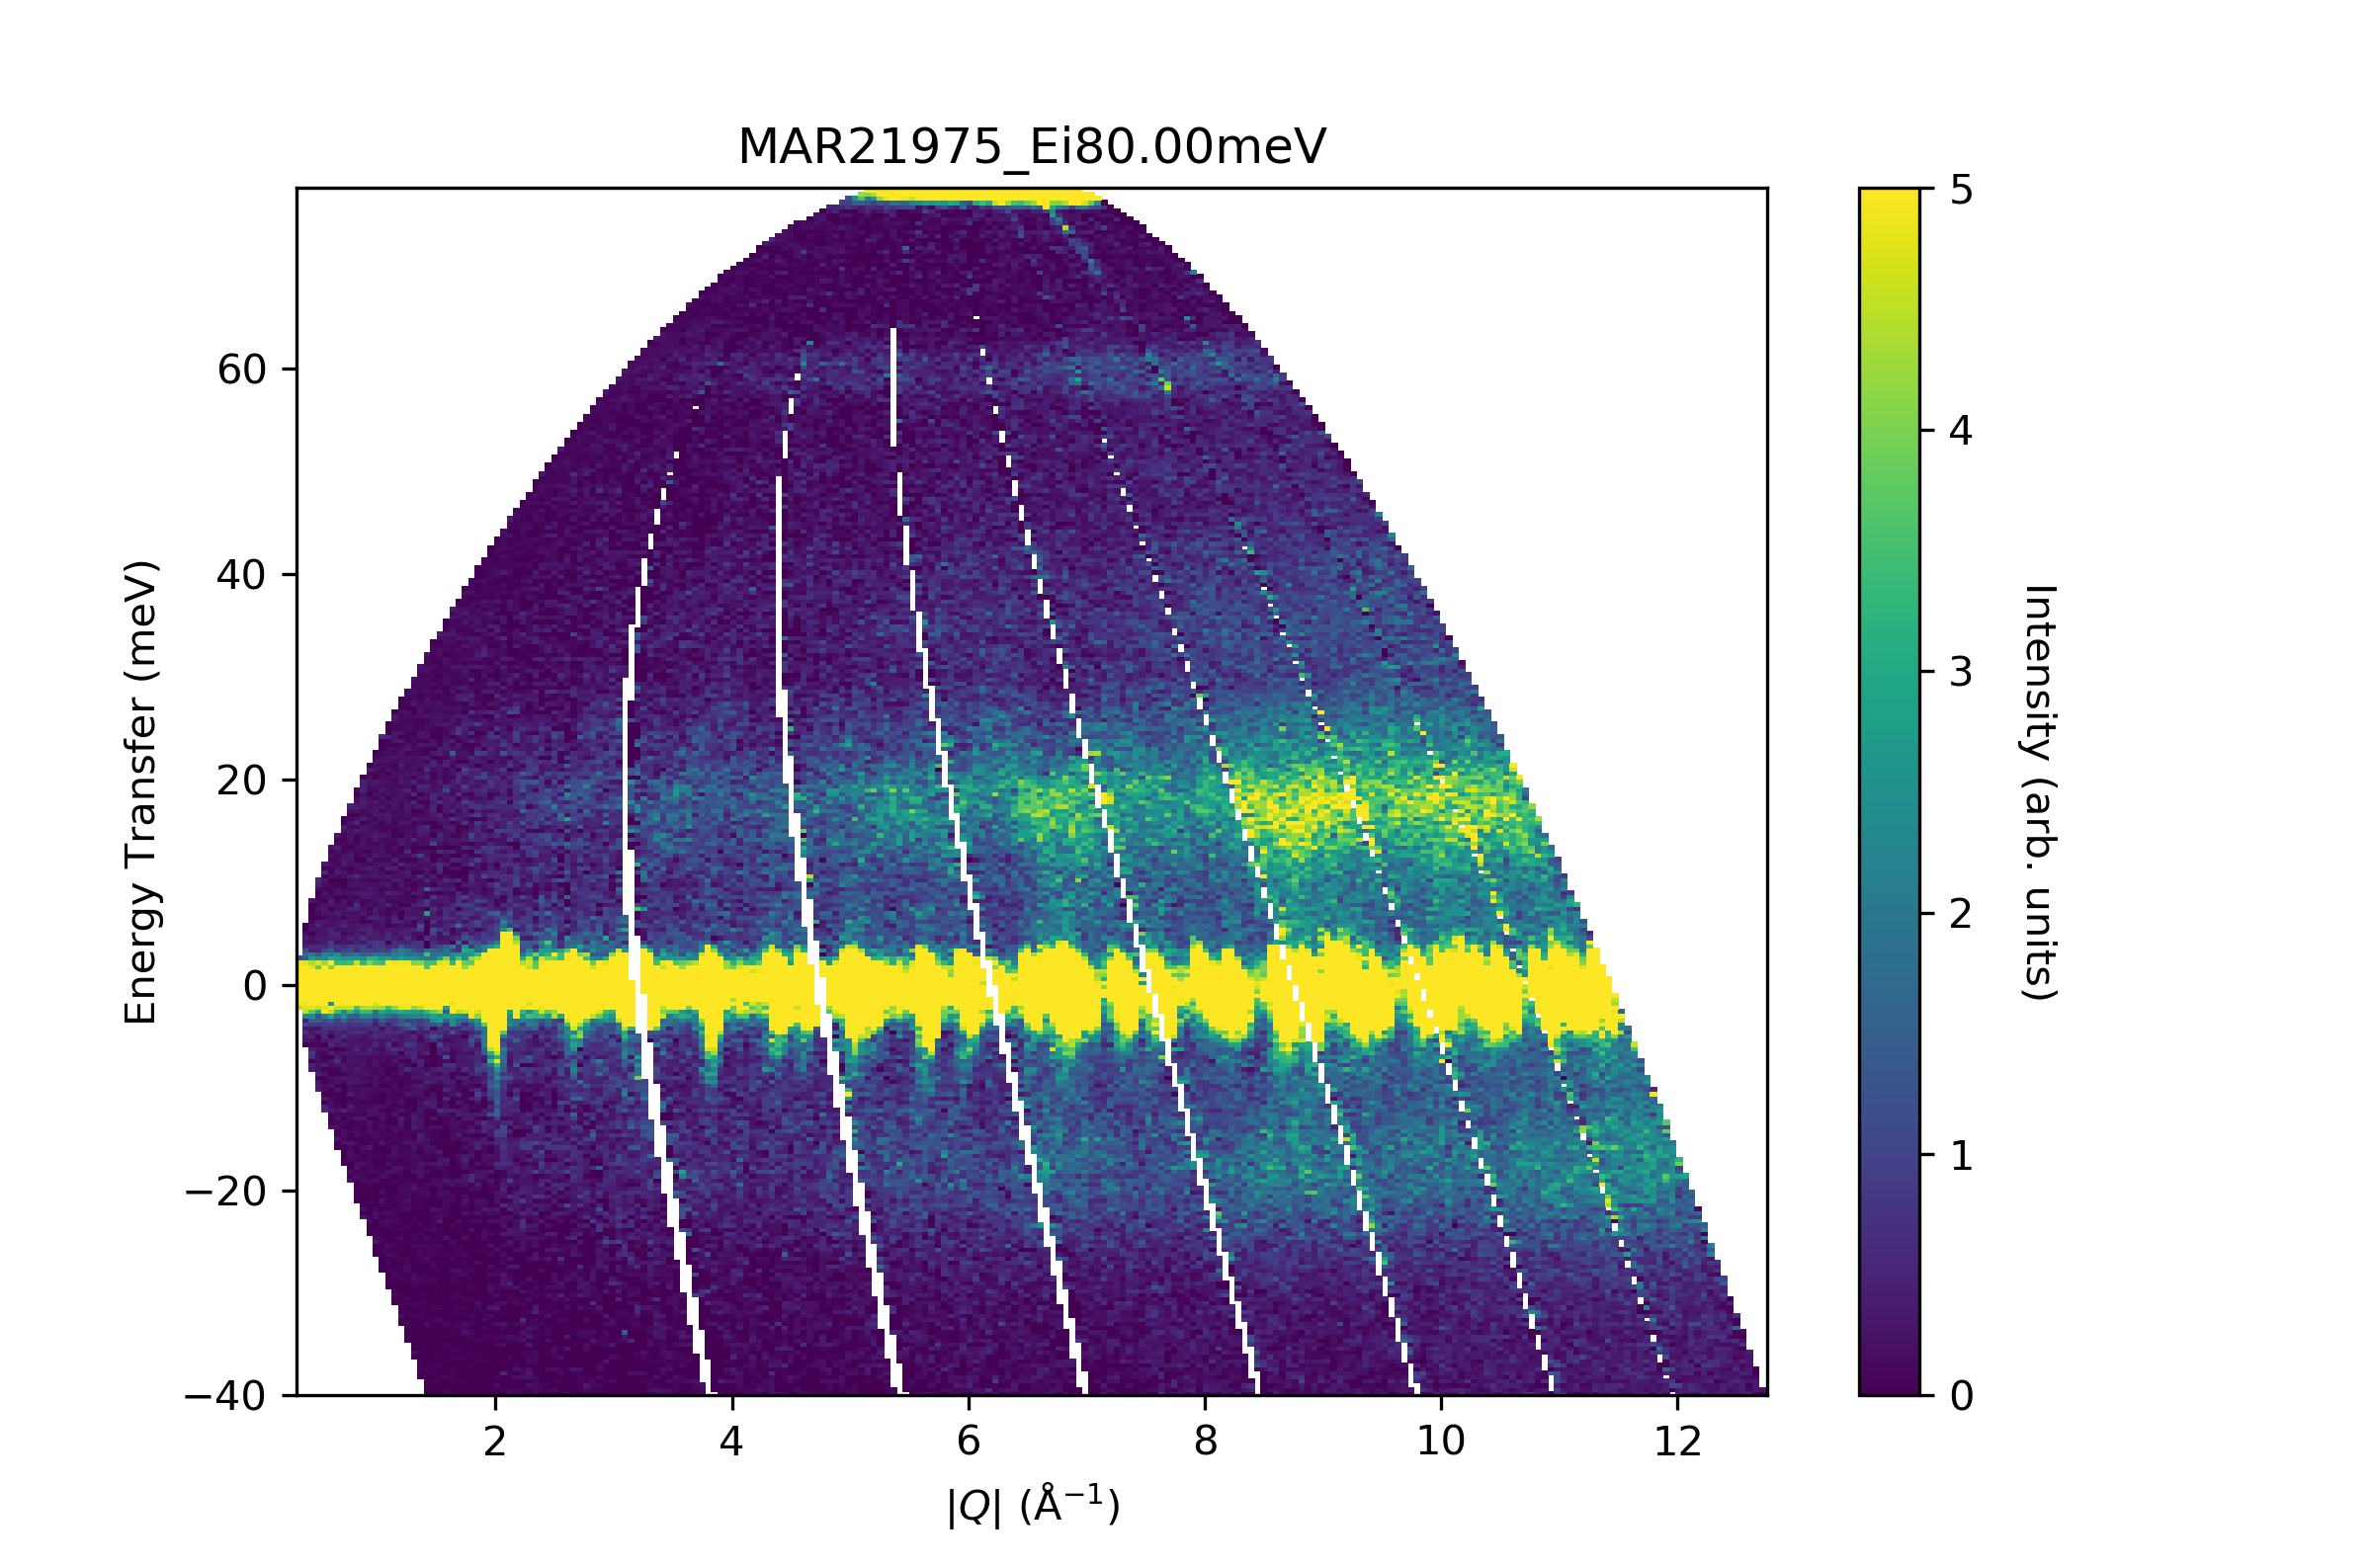

**Solution**

`euphonic-powder-map ../euphonic_files/Si-prim-555.json -w coherent --q-max 12 --temperature 300 --grid 20 20 20 --npts-density 500 --npts-max 10000 --eb 1 --e-min -40 --e-max 70 --v-max 7e-5 --n-threads 30`

ForceConstants data was loaded
Setting up dimensions...
Calculating Debye-Waller factor on 20 x 20 x 20 q-point grid
Sampling 480 |q| shells between 0.0 1/Å and 12.0 1/Å
Final npts: 10000
Plotting figure: max intensity 5.071255003662072 mb/meV


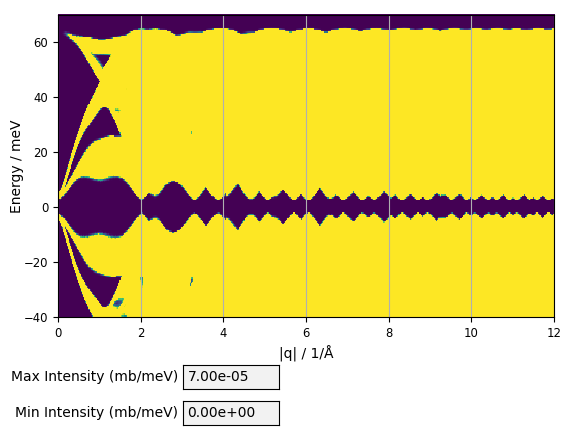

In [51]:
pmain(['/mnt/ceph-training/course_materials/euphonic_files/Si-prim-555.json', '-w=coherent', '--q-max=12', '--temperature=300',
       '--grid', '20', '20', '20', '--npts-density=500', '--npts-max=10000', '--eb=1',
       '--e-min=-40', '--e-max=70', '--n-threads=4', '--v-max=7e-5'])

## 5. Use with Horace

In [52]:
#first start up the matlab bits
from pace_neutrons import Matlab
m = Matlab()

# Import euphonic models
from euphonic_sqw_models import CoherentCrystal

Trying MATLAB version: 2022b (/mnt/ceph-training/course_materials/pace_env/lib/python3.11/site-packages/pace_neutrons/ctfs/pace_2022b.ctf))
Searching for Matlab 9.13 in /opt/matlab2021b
Searching for Matlab 9.13 in /opt
Trying MATLAB version: 2021b (/mnt/ceph-training/course_materials/pace_env/lib/python3.11/site-packages/pace_neutrons/ctfs/pace_2021b.ctf))
Searching for Matlab 9.11 in /opt/matlab2021b
Found Matlab 9.11 glnxa64 at /opt/matlab2021b
Interface opened
All features have moved to hor_config
> In herbert_config (line 3)
In pyhorace_init (line 7)
In call>eval_ans (line 103)
In call (line 45)

!==================================================================!

!          ISIS utilities for visualization and analysis           !
!                   of neutron spectroscopy data                   !
!                          Herbert 4.0.0                           !
!------------------------------------------------------------------!

All features have moved to hor_config

!====

In addition to the previous Python only processing, you can also run Euphonic with Horace.

We will go back to the quartz simulations we were playing with initially and see if they have any similarity to reality. First, we need to take some cuts through the quartz data. Quartz is trigonal (P3121) and in this case it was aligned with the hk0 in the horizontal scattering plane (note that h and k are not perpendicular to each other). Try taking some cuts through the data, making sure that at least one of them is either at l≠0 or is along the l direction. Now, we are going to try simulating these cuts. For the moment please use the `'-nopix'` option in your cuts!!! Two or three nice colour maps should be more than sufficient.

*** Step 1 of 2; Read data for  9088509 pixels -- processing data...
 ----->  included   6098023 pixels

*** Step 2 of 2; Read data for  5284746 pixels -- processing data...
 ----->  included   1767097 pixels



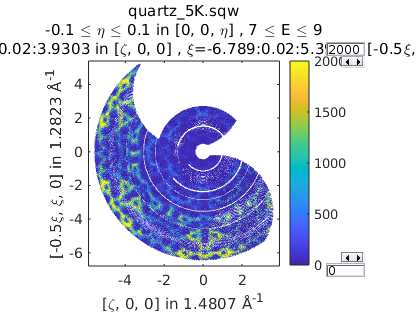

In [53]:
sqw_file = '/mnt/ceph/auxiliary/excitations/edatc/quartz_5K.sqw'

u = [1,0,0]
v = [0,1,0]
offset = [0,0,0,0]
projtype = 'rrr'

proj = m.line_proj(u, v, 'offset', offset, 'type', projtype)
my_slice = m.cut_sqw(sqw_file, proj, [0.02], [0.02], [-0.1,0.1], [7,9], '-nopix')

%matlab_plot_mode inline

my_slice.plot()
m.lz(0, 2000)

We are now going to setup euphonic. First, we need to load the force constant model 

You will need the quartz force constants `quartz.castep_bin` which you can find again in the `/mnt/ceph/auxiliary/excitations/edatc/` folder. We load them with `fc = euphonic.ForceConstants.from_castep('fname')` 

Using Euphonic to interpolate for q-points 0:299019 out of 299019


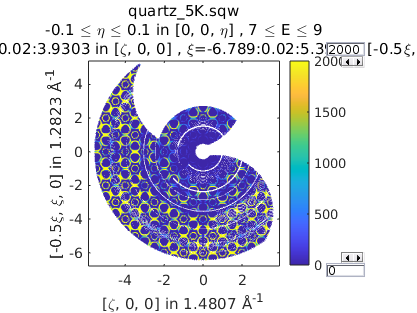

In [54]:
fc = euphonic.ForceConstants.from_castep('/mnt/ceph/auxiliary/excitations/edatc/quartz.castep_bin')

# This done, we set up a crystal object
coh_model = CoherentCrystal(
   fc, debye_waller_grid=[6,6,6], temperature=5,
   asr='reciprocal', use_c=True)

# Here we give it the density of points for the debye-waller factor, temperature and acoustic sum rule. 

# To produce an output we simply need
scale_factor = 600
effective_fwhm = 0.5
intrinsic_fwhm = 0.1

sim_slice = m.disp2sqw_eval(
   my_slice, coh_model.horace_disp, (scale_factor,), effective_fwhm)

sim_slice.plot()
m.lz(0, 2000)

Choose whichever value you want/feel is appropriate for `scale_factor` and the FWHM. 

How do your cuts look? Look especially carefully at cuts that have values of l≠0, are they correct?

Of course they are not, quartz has no centre of inversion and so it is possible to put the crystal (or calculate it) upside down. When we setup the `CoherentCrystal` we can add an extra term to define a translation matrix, `conversion_mat`. This is handy as calculations are often performed in the primitive cell (for convenience) while the experiment will use a larger but simpler to visualize cell. The `conversion_mat` matrix lets us convert one into the other. For this case we need to use a matrix of the form:

$$\left( \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -1 \end{array} \right)$$

Using the [help](https://horace-euphonic-interface.readthedocs.io/en/stable/) put this in and try the calculation again. Is it better?

Using Euphonic to interpolate for q-points 0:299019 out of 299019


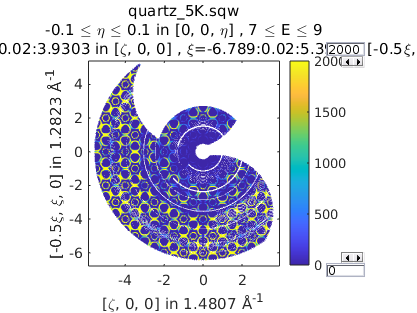

In [55]:
coh_model = CoherentCrystal(
   fc, debye_waller_grid=[6,6,6], temperature=5,
   asr='reciprocal', use_c=True, conversion_mat=[[1,0,0], [0,1,0], [0,0,-1]])

# Here we give it the density of points for the debye-waller factor, temperature and acoustic sum rule. 

# To produce an output we simply need
scale_factor = 600
effective_fwhm = 0.5
intrinsic_fwhm = 0.1

sim_slice = m.disp2sqw_eval(
   my_slice, coh_model.horace_disp, (scale_factor,), effective_fwhm)

sim_slice.plot()
m.lz(0, 2000)

By eye the agreement should be fairly strong if you have done everything correctly. Colour plots though can be misleading and it is always hard to compare individual points to each other. 

Now, try taking some 1D cuts through the data. How does it look? Depending on your cut sizes and FWHM it might look really good however, it might also look poor with some peaks much broader in reality than expected and perhaps worse at higher energy transfers.

There are two things happening here, first, the cuts you have made have a finite width, however euphonic knows nothing of them as we did not preserve the pixel information. This width will broaden dispersive excitations and if we want it to be captured in our model we will need to give euphonic all the pixel information. It can handle this but even a small cut can be 100,000 pixels so please do not start off trying to model a large colour plot, stick to the line plots. Now, repeat your line cut with the pixel information and rerun the simulation. Is it better?

*** Step 1 of 1; Read data for   403512 pixels -- processing data...
 ----->  retained     26903 pixels

*** Completed cat_pixels using 1 pages in 0.062843 sec.



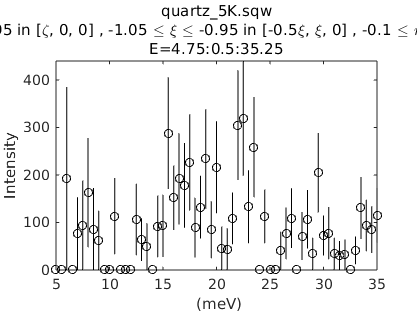

In [56]:
cut1 = m.cut_sqw(sqw_file, proj, [-3.05, -2.95], [-1.05, -0.95], [-0.1, 0.1], [5,0.5,35])
cut1.plot()
%matlab_plot_mode inline

Using Euphonic to interpolate for q-points 0:26903 out of 26903


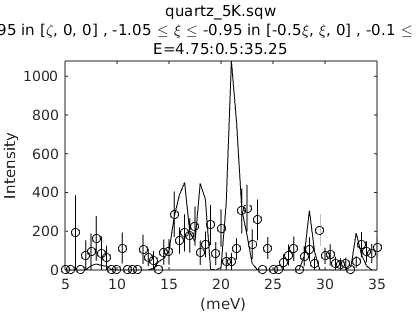

In [57]:
scale_factor = 600
effective_fwhm = 0.5

cut_sim = m.disp2sqw_eval(
   cut1, coh_model.horace_disp, (scale_factor,), effective_fwhm)

m.acolor('black')
m.plot(cut1)  # Plots data as points
m.pl(cut_sim) # Plots sim as line over data

The final thing you might need is to properly capture the resolution function. The resolution on our instruments is not the same as a function of energy transfer (or scattering angle).

For the resolution convolution calculation, we first have to set some sample and instrument information on the cut we want to fit ([documentation](https://pace-neutrons.github.io/Horace/unstable/user_guide/Resolution_convolution.html#the-tobyfit-class)), then set up a `tobyfit` object then simulate the cut with resolution convolution.

As mentioned previously, `tobyfit` calculates the intensity at _each_ "pixel" with nominal momentum and energy transfer $(\mathbf{Q}_0, \omega_0)$ as $I(\mathbf{Q}_0, \omega_0) = \int R(\mathbf{Q}-\mathbf{Q}_0,\omega-\omega_0) S(\mathbf{Q},\omega) d\mathbf{Q}d\omega$ by Monte Carlo integration by taking $N_{\mathrm{mc}}$ random samples of positions $(\mathbf{Q},\omega)$ in the distribution defined by $R$. 

$N_{\mathrm{mc}}=10$ by default because the number of pixels $I(\mathbf{Q}_0, \omega_0)$ per bin is usually large (e.g. in the above small cut `cut1` we have $\approx$34000 pixels but only 61 energy bins so on average there would be $\approx 500$ pixels per bin.

This does mean, however, that it takes $N_{\mathrm{mc}}$ times longer to make a resolution convolution calculation than a normal calculation.


Using Euphonic to interpolate for q-points 0:22099 out of 22099
Using Euphonic to interpolate for q-points 0:22099 out of 22099
Using Euphonic to interpolate for q-points 0:22099 out of 22099
Using Euphonic to interpolate for q-points 0:22099 out of 22099
Using Euphonic to interpolate for q-points 0:22099 out of 22099


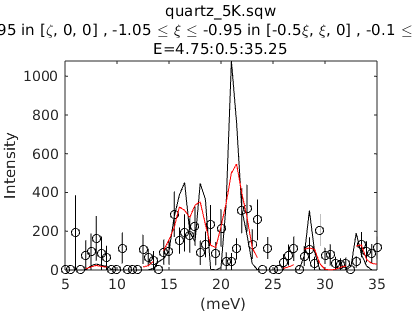

In [58]:
m.hpc('off')  # Parallel sqw evaluation does not work at present in Python due to a bug

# Sets the sample shape on the cut
xgeom = [0,0,1]
ygeom = [0,1,0]
shape = 'cuboid'
shape_pars = [0.01,0.05,0.01]
cut1 = m.set_sample(cut1, m.IX_sample(xgeom, ygeom, shape, shape_pars))

# Sets the Merlin instrument parameters from the measurement on the cut
ei = 45.12; freq = 350; chopper = 'g'
cut1 = m.set_instrument(cut1, m.merlin_instrument(ei, freq, chopper))

# Define an intrinsic energy width of the excitation (related to the phonon lifetime)
intrinsic_fwhm = 0.1

# Sets up a tobyfit object and sets the number of Monte Carlo points to 5.
disp2sqw = m.eval('@disp2sqw')
tbfobj = m.tobyfit(cut1)
tbfobj = tbfobj.set_fun(disp2sqw, [coh_model.horace_disp, [scale_factor], intrinsic_fwhm])
tbfobj = tbfobj.set_mc_points(5)
cut_res = tbfobj.simulate()

m.acolor('black')
m.plot(cut1)     # Plots the data as black points
m.pl(cut_sim)    # Plots the previous simulation as a black line
m.acolor('red')  
m.pl(cut_res)    # Plots the resolution convolved simulation as a red line